In [10]:
# Images encodes as base64 will be exported correctly,
# otherwise when slideshow is exported, images do not show.
# Use this for image source then: <img src="data:image/png;base64,%B64_SOURCE%"/>
import base64
def make_img(im_path):
    with open(im_path, "rb") as image_file:
        return base64.b64encode(image_file.read())

<h1>Enriched Camera Monitoring System</h1>
<h3 style="margin-top: 18px; margin-bottom: 10px;">With Computer Vision and Machine Learning</h3>

- **Student:** Adam Napora (18197892)
- **Supervisor:** Alessio Benavoli
- **Date:** 3rd September 2020

<!-- <img src="./Resources/img/UL_logo_new_scaled.png"/> -->
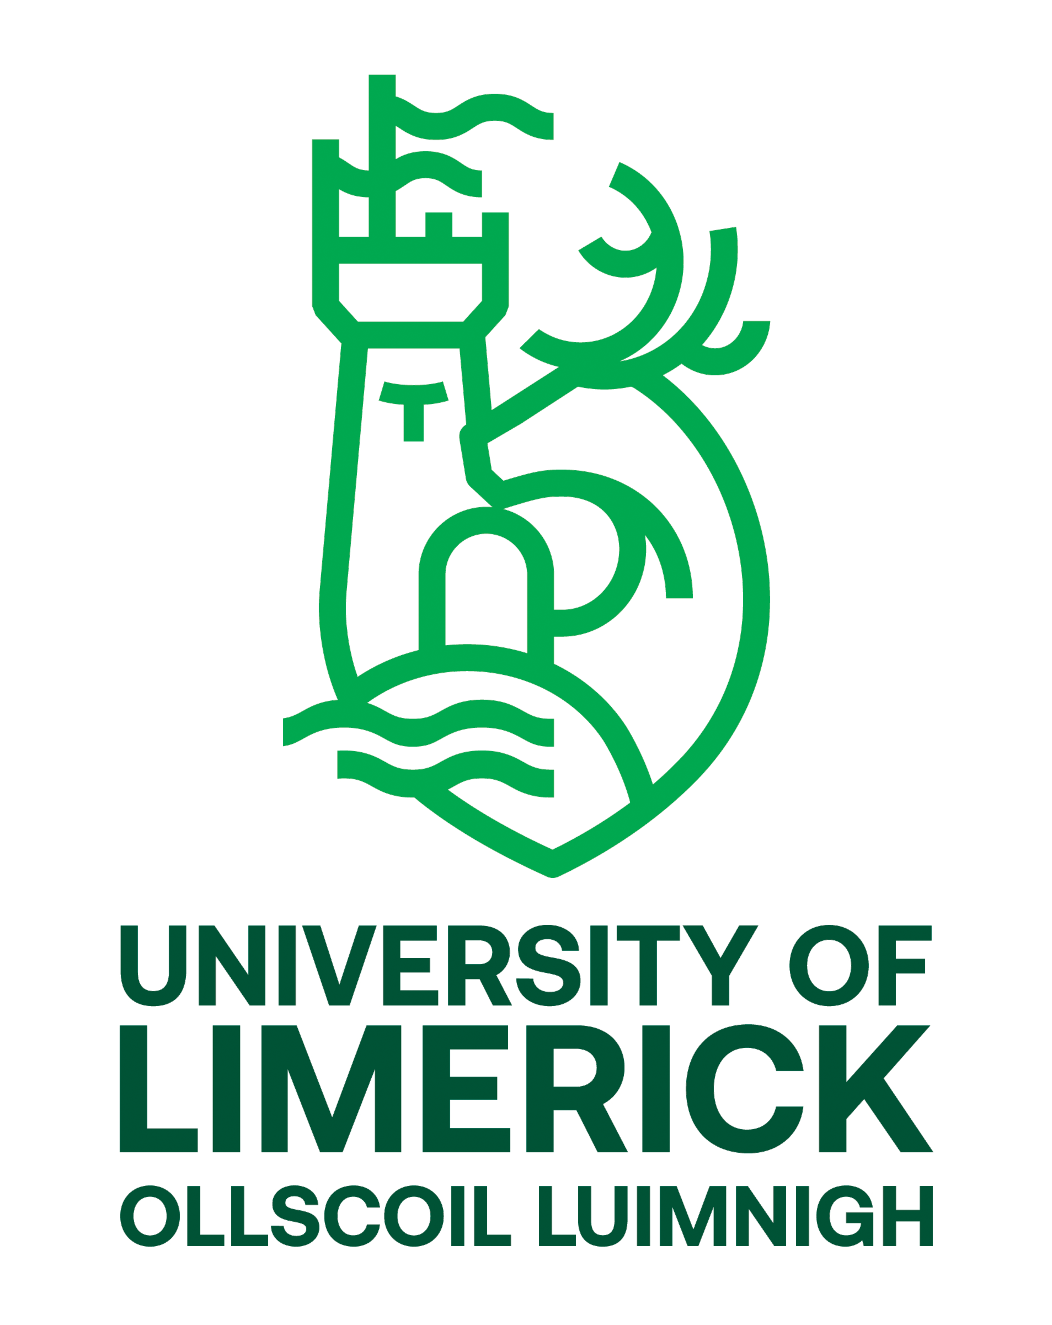

## Introduction

This research is a study of a Smart Camera Monitoring System.

- **Initial goal:** (2018) Build a toy object detection project for cat behaviour monitoring
- **Key milestone:** (2019, in Limerick)
>Can object detections be used to predict future events?
- **Ultimate idea:** What are the opportunities to find anomalous signals, given the object detections, and the predictions?

## Research Questions

1. What is the level of complexity, required to build a fast, and reliable object detection pipeline, with the use of IOT devices and Computer Vision?
2. Given the dataset with collected images, can the future object counts be accurately predicted via Machine Learning?
3. Can Anomaly Detection algorithms help to recognize anomalous patterns in the object detection data?

If goals are achieved, the final product should be generic, and applicable to other use cases (examples: predict traffic, tourist conjestion, or animal behaviour).

## Contributions

There seems to be a gap in the literature, where Object Detection, Forecasting and Anomaly Detection techniques are combined in a coherent study (with practical application for Camera Monitoring).

- Object detections are a valuable data asset, and can be utilized for various purposes
- Two proposed methods to handle anomaly detection, have the potential to detect anomalies from the image data
- Any person, with some Computer Science skills, should be able to set up their own system, and boost security (source code from this research is on [Github](https://github.com/Alchemication/cvdl-for-home))

## Methodology

- Data Collection
- Prediction of Future Events
- Anomaly Detection
- Tools/Technology used

## Data Collection - System Diagram

<center style="margin-top: 40px;">
<!--     <img src="./Resources/img/zmq.png"/> -->
    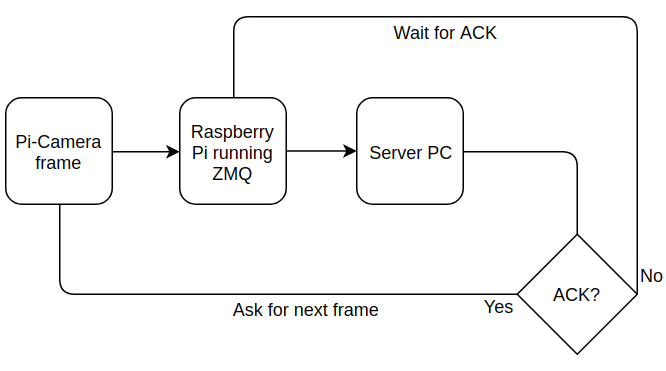
</center>

## Data Collection - Hardware

<div class="row">
  <div class="col-md-6" style="padding-top: 40px;">
    <ol>
      <li>Set up Networking:
      <ul>
          <li><strong>Ethernet</strong></li>
          <li>Switches</li>
          <li>Static IP Addresses</li>
      </ul>
      <li>Configure Hardware:</li>
      <ul>
        <li>Desktop PC (<strong>GPU</strong>)</li>
        <li>Raspberry PI (+ Pi Camera)</li>
      </ul>
    </ol>
  </div>
  <div class="col-md-6 center-block" style="position: relative;">
<!--     <img src="Resources/img/rpi-cam.png"/> -->
    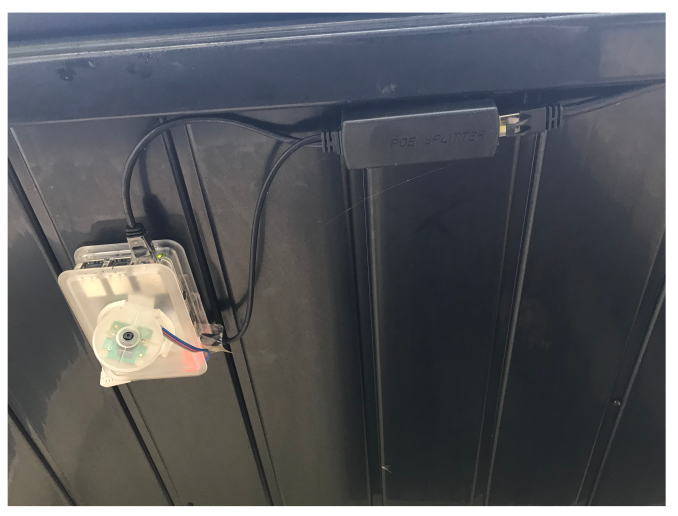
<!--     <img src="Resources/img/rpi-cam2.png"/> -->
    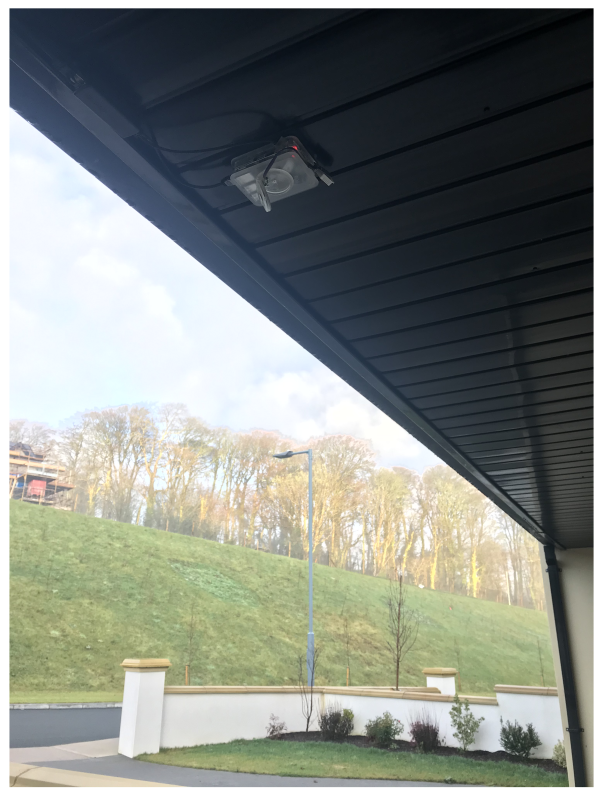
  </div>
</div>

## Data Collection - Frame Processing

Data pipeline for each frame received by the Desktop PC:

<center style="margin-top: 40px;">
<!--     <img src="./Resources/img/obj-detection-simple.png"/> -->
  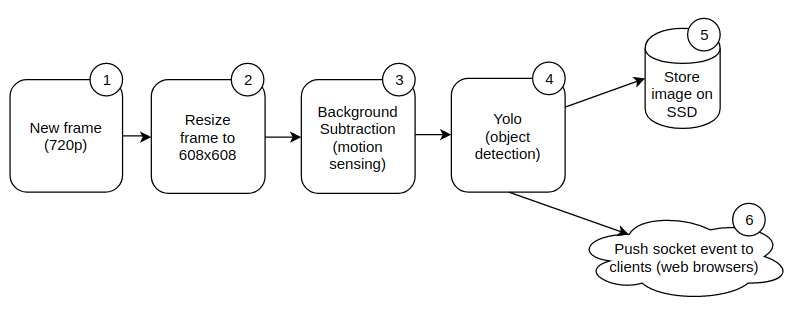
</center>

## Prediction of Future Events

- Prepare data
    - Clean up
    - Extract detections from saved images (Yolo, OpenCV)
    - Count **unique** objects in a time interval (Euclidean Distance)
    - Fetch Weather data
- Train supervised Machine Learning algorithm (**Poisson** loss)
- Use model to generate predictions:
    - How many `people` will show between `7AM and 8AM`, on `Saturday`, given a `sunny` and `warm` day?
    - Predictions are the probabilities for each count: $\{0,1,2, ... ,10\}$

## Anomaly Detection

- Hourly threshold estimation
    - **Problem:** How can too many objects in a time interval be flagged as anomaly?
    - **Solution:** Estimate a maximum threshold via probabilistic programming (pymc3)
- Raw image classification
    - **Problem:** How to determine, if frames from camera contain anomalous content?
    - **Solution:** Unsupervised Machine Leaning problem, Convolutional Auto-Encoder (trained via Deep Learning library Keras)

## Tools / Software used

- **Python3** - primary programming language
- **Jupyter Notebooks** - experiments and dissertation
- **Python libraries**:
    - **Pandas, Numpy** - data processing and manipulation
    - **OpenCV** - Computer Vision
    - **Plotly** - Data visualization
    - **Pymc3, GPy** - Bayesian programming, Gaussian Process
    - **Sklearn, Keras** - Machine Learning, Deep Learning
    - **ImageZMQ** - Message Queue
- **VueJS** - JavaScript framework for modern and scalable UI's

## Results

- Data Collection
- Future events prediction
- Anomaly detection - Hourly thresholds estimation
- Anomaly detection - Raw image pixel anomalies

## Data Collection

- Environmental challenges (sun, rain, wildlife)
- Hardware, network configuration (camera placement, PC build) and efficient code-base (threading, socket programming)
- 6 months of image data collected (600K+ detections, 180 GB), with 3 days of downtime (power outages), file naming convention / object category distribution:

<div class="row">
  <div class="col-md-6" style="padding-top: 0">
    <center style="">
<!--     <img src="./Resources/img/file_struct_simple.png"/> -->
  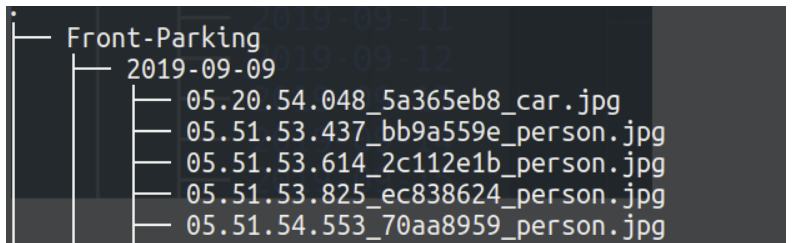
</center>
    </div>
    <div class="col-md-6" style="">
<!--     <img src="./Resources/img/fcst-class-dist"/> -->
        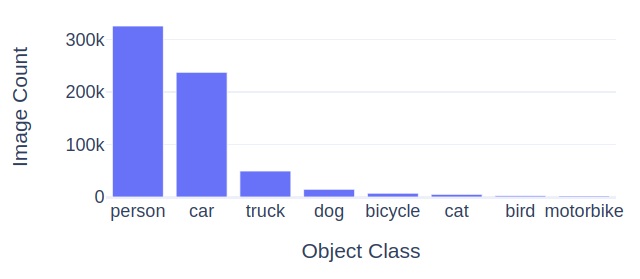
    </div>
  </div>
</div>

## Future events prediction

- All tested algorithms had their benefits and drawbacks
- Gaussian Process and Histogram-based Gradient Boosting Regressor achieved the lowest error rates for *Person* prediction:


| Model                | Mean Poisson Deviance | Mean Squared Error | Mean Absolute Error | R2 Score |
| -------------------- | --------------------- | ------------------ | ------------------- | -------- |
| **Gaussian Process** | 1.21                  | 2.35               | 0.86                | 0.33     |
| **Gradient Boost**   | 1.25                  | 2.47               | 0.87                | 0.36     |

- Gaussian Process allows to analyze and utilize uncertainty in the predictions
- Gradient Boost is more robust, when used on various object categories (Person, Vehicle etc.)

## Anomaly detection - Hourly thresholds estimation

- Upper thresholds estimated with probabilistic programming
- Prior: gamma distribution, likelihood: Poisson
- Estimated thresholds by hour:

<center style="margin-top: 30px;">
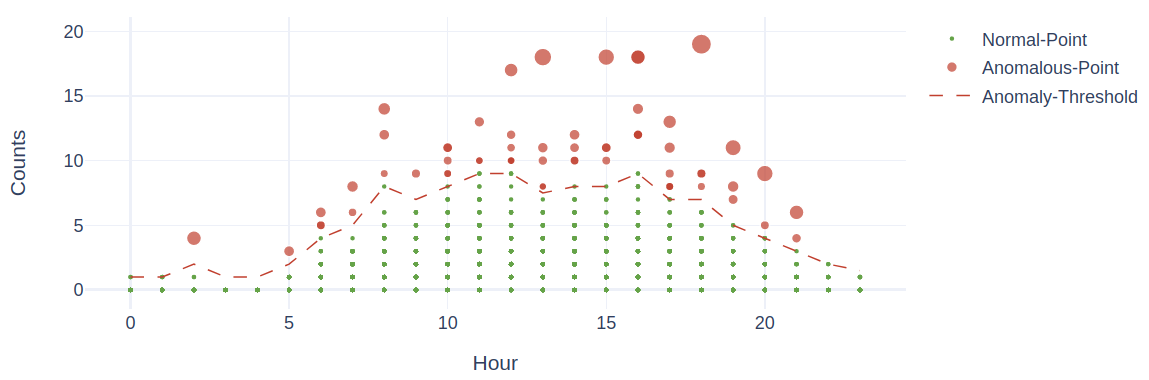
</center>

## Anomaly detection - Raw image pixel analysis

- Unsupervised Machine Learning with Convolutional Auto Encoder
- Dataset: sampled $10K$ images, resized to $56 \times 56$
- Images heavily preprocessed. Example original / preprocessed images below:

<div class="row">
  <div class="col-md-6" style="padding-top: 10px;">
    <center>
<!--     <img src="./Resources/img/orig-image.png"/> -->
      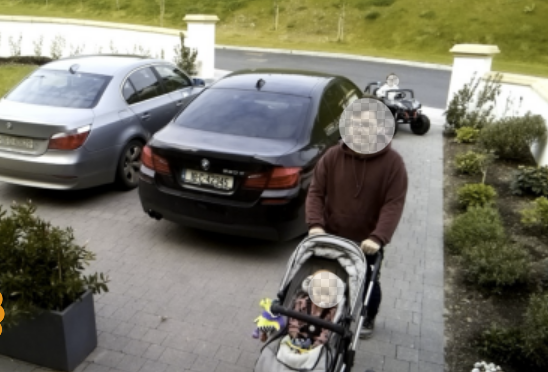
    </center>
  </div>
  <div class="col-md-6" style="">
<!--     <img src="./Resources/img/processed-image-combined.png"/> -->
    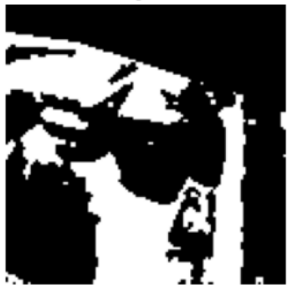
  </div>
</div>

## Anomaly detection - Raw image pixel analysis

Test on classification of hand-labeled dataset with 30 images (optimized for *Recall*):

<center>
<!-- <img src="./Resources/img/au-hand-crafted-hist.png"/> -->
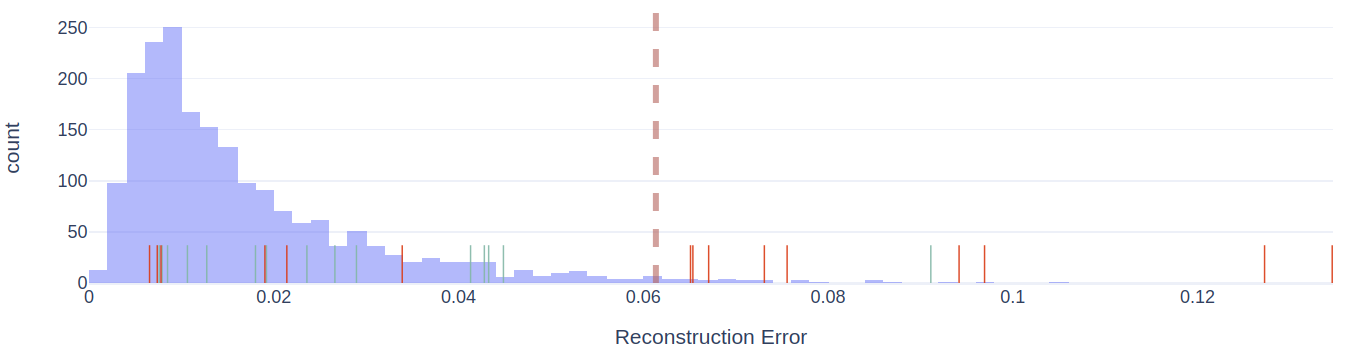
</center>
    
The plot shows $6$ anomalous images misclassified out of $15$ (Recall=$0.6$).

## Limitations

- System not tested yet in another location (generalization)
- Utilized camera type is basic (lack of night vision capability, or waterproof case)
- Limited forecast accuracy (stochastic process)
- An alternative source of power is not available (loss in power means loss in data)

## Suggested Improvements

- Develop a Minimum Viable Product, to identify incorrect assumptions, and potential weaknesses
- Incorporate **ethics** and privacy protection
- Deploy in another household
- Improve objects counting technique
- Try another camera (night vision, waterproof)

- And many other ...

## Demo

- data collection
    - set up message queue on the server
    - start streaming from R-Pi
    - show UI and command line in the backgroung
- forecast:
    - training
    - generate predictions
    - show how predictions have updated in UI
    - toggle forecast mode and explain sections
- todo:
    - anomaly detection (code exists in the Notebooks)